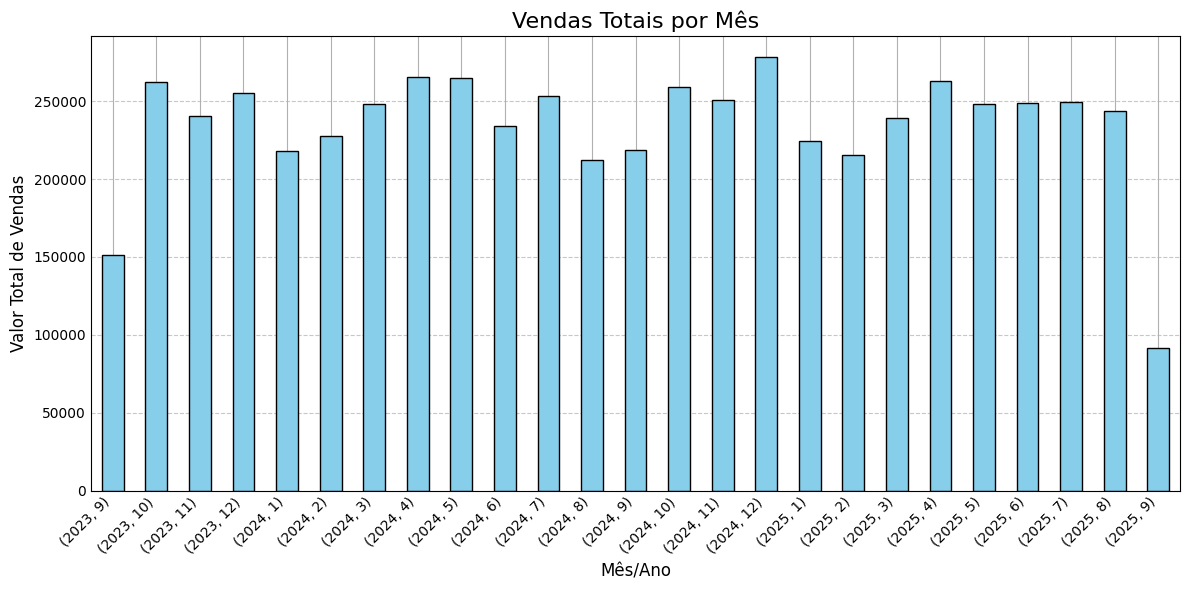

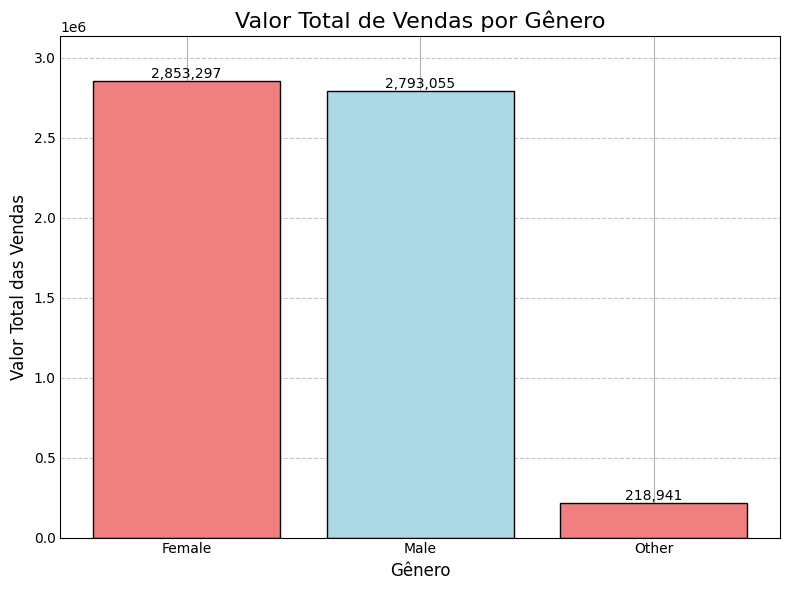

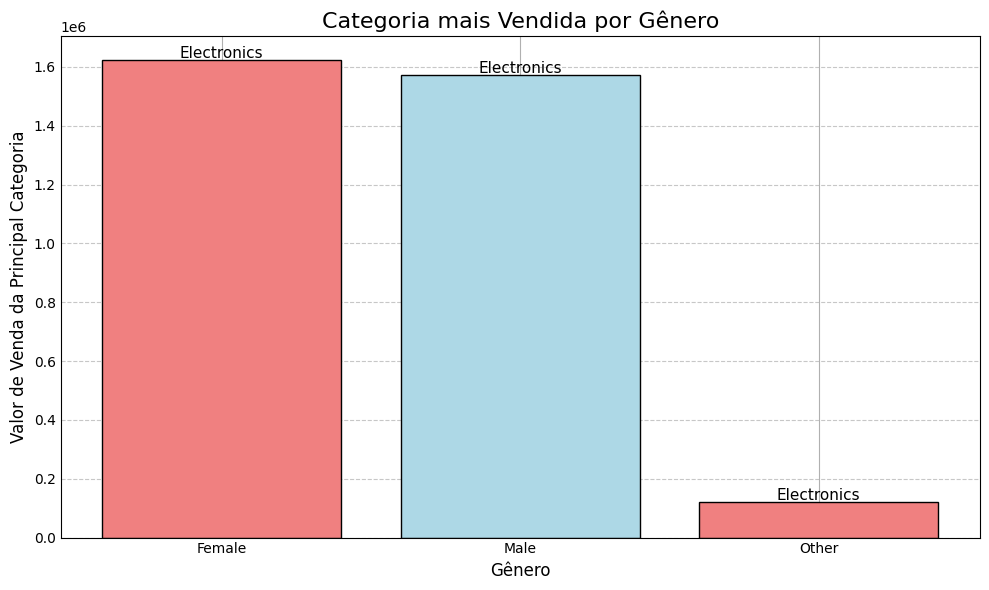

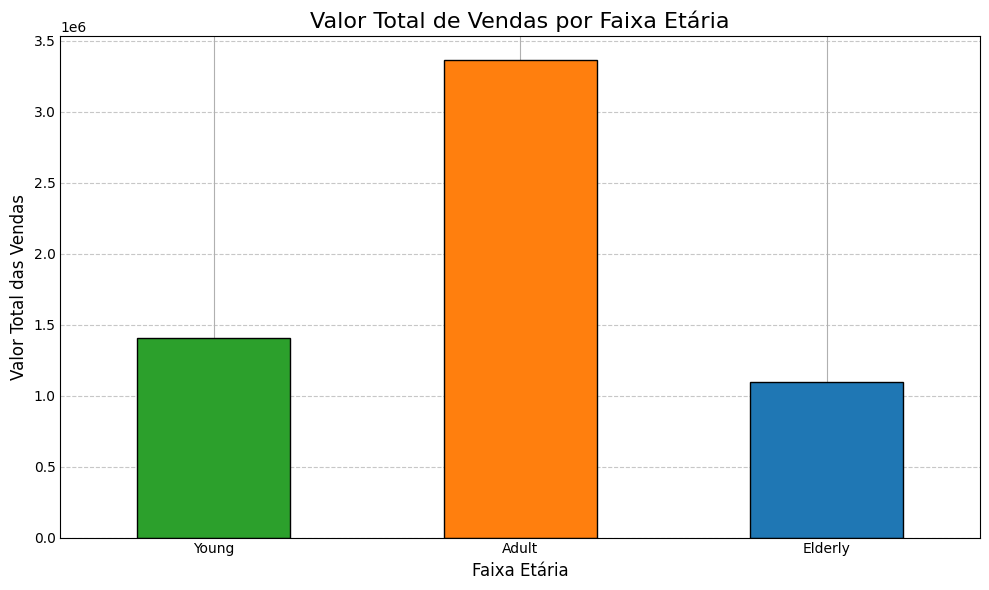

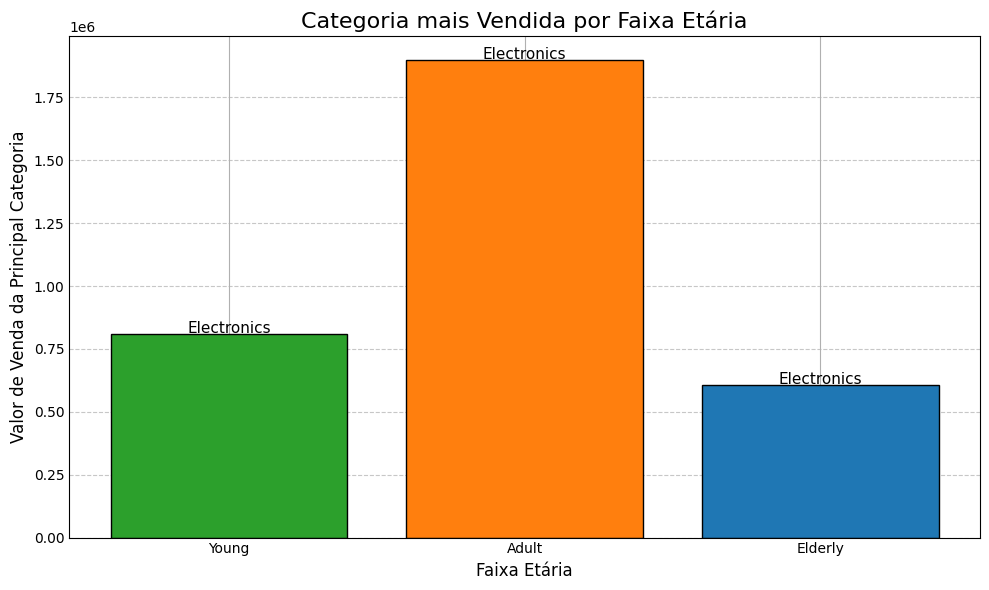

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/ecommerce_sales_34500.csv')

df['order_date'] = pd.to_datetime(df['order_date'])

df['month'] = df['order_date'].dt.month
df['year'] = df['order_date'].dt.year

# Análise de Vendas por Mês
sales_per_month = df.groupby(['year', 'month'])['total_amount'].sum()

plt.figure(figsize=(12, 6))
sales_per_month.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Vendas Totais por Mês/Ano', fontsize=16)
plt.xlabel('Mês/Ano', fontsize=12)
plt.ylabel('Valor Total de Vendas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# Análise por Gênero e Categoria
sales_per_gender = df.groupby('customer_gender')['total_amount'].sum()

plt.figure(figsize=(8,6))
bars = plt.bar(sales_per_gender.index, sales_per_gender.values, color=['lightcoral', 'lightblue'], edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'{yval:,.0f}', ha='center', va='bottom')

plt.title('Valor Total de Vendas por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Valor Total das Vendas', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, sales_per_gender.max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Análise da Categoria Mais Vendida por Gênero
category_per_gender = df.groupby(['customer_gender', 'category'])['total_amount'].sum().reset_index()
idx = category_per_gender.groupby('customer_gender')['total_amount'].idxmax()
top_categories = category_per_gender.loc[idx]

plt.figure(figsize=(10, 6))
plt.bar(top_categories['customer_gender'], top_categories['total_amount'], color=['lightcoral', 'lightblue'], edgecolor='black')
plt.title('Categoria mais Vendida por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Valor de Venda da Principal Categoria', fontsize=12)

for i, row in top_categories.iterrows():
    plt.text(row['customer_gender'], row['total_amount'] + 5000, row['category'], ha='center', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Análise por Faixa Etária
bins = [float('-inf'), 29, 59, float('inf')]
labels = ['Young', 'Adult', 'Elderly']
df['Age_Group'] = pd.cut(x=df['customer_age'], bins=bins, labels=labels)

sales_per_age_group = df.groupby('Age_Group', observed=True)['total_amount'].sum()

plt.figure(figsize=(10, 6))
sales_per_age_group.plot(kind='bar', color=['#2ca02c', '#ff7f0e', '#1f77b4'], edgecolor='black')

plt.title('Valor Total de Vendas por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Valor Total das Vendas', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Categoria mais Vendida por Faixa Etária
category_per_age_group = df.groupby(['Age_Group', 'category'], observed=True)['total_amount'].sum().reset_index()
idx_age = category_per_age_group.groupby('Age_Group', observed=True)['total_amount'].idxmax()
top_categories_age = category_per_age_group.loc[idx_age]

plt.figure(figsize=(10, 6))
colors = {'Young': '#2ca02c', 'Adult': '#ff7f0e', 'Elderly': '#1f77b4'}
plt.bar(top_categories_age['Age_Group'], top_categories_age['total_amount'], color=top_categories_age['Age_Group'].map(colors), edgecolor='black')

plt.title('Categoria mais Vendida por Faixa Etária', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Valor de Venda da Principal Categoria', fontsize=12)

for i, row in top_categories_age.iterrows():
    plt.text(row['Age_Group'], row['total_amount'] + 3000, row['category'], ha='center', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()